In [23]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [24]:
given_lat= -20.296059
given_lon= -85.824539

In [25]:
date_column = np.empty((0,),dtype='datetime64')
conc_column = np.empty((0,),dtype='float64')

In [26]:
lon_index = int(((np.floor(given_lon/0.625) * 0.625) - (-180))/0.625)
lon_index = 0 if lon_index == 576 else lon_index
lat_index = int(((np.floor(given_lat/0.5) * 0.5) - (-90))/0.5)

In [27]:
# Keep your data files here
data_folder = os.listdir('../data/aqi1') 

In [28]:
for data_file in data_folder:
    data = xr.open_dataset(f"../data/aqi1/{data_file}")

    conc_data = np.array(data['DUSMASS'].values)[0]
    date_data = data.coords['time'].values
    
    date_val = date_data[0]
    conc_val = conc_data[lat_index][lon_index]

    date_column = np.append(date_column, date_val)
    conc_column = np.append(conc_column,conc_val)

In [29]:
date_column.shape

(228,)

In [30]:
conc_column.shape

(228,)

In [31]:
pm10_df = pd.DataFrame({'conc' : conc_column}, index=date_column)
pm10_df.index = pd.to_datetime(pm10_df.index.strftime('%Y-%m-%d'),format='%Y-%m-%d')
pm10_df

,conc
2005-01-01,8.985263e-10
2005-02-01,1.123116e-09
2005-03-01,5.747319e-10
2005-04-01,9.397831e-10
2005-05-01,2.755682e-10
...,...
2023-08-01,5.012480e-10
2023-09-01,4.195248e-10
2023-10-01,5.129324e-10
2023-11-01,5.429798e-10


In [32]:
pm10_df.describe()

,conc
count,2.280000e+02
mean,7.199557e-10
std,3.317879e-10
min,1.224382e-10
25%,4.683865e-10
50%,6.386279e-10
75%,9.259206e-10
max,1.996387e-09


In [33]:
pm10_df.value_counts().shape

(228,)

In [34]:
scaler = MinMaxScaler()
pm10_df['conc'] = scaler.fit_transform(pm10_df[['conc']])
pm10_df

,conc
2005-01-01,0.414146
2005-02-01,0.533994
2005-03-01,0.241359
2005-04-01,0.436162
2005-05-01,0.081715
...,...
2023-08-01,0.202145
2023-09-01,0.158535
2023-10-01,0.208380
2023-11-01,0.224415


In [35]:
pm10_df['datetime'] = pm10_df.index.astype('str')
pm10_df = pm10_df[['datetime','conc']]
pm10_df.reset_index(drop=True, inplace=True)
pm10_df.columns=['ds','y']
pm10_df

,ds,y
0,2005-01-01,0.414146
1,2005-02-01,0.533994
2,2005-03-01,0.241359
3,2005-04-01,0.436162
4,2005-05-01,0.081715
...,...,...
223,2023-08-01,0.202145
224,2023-09-01,0.158535
225,2023-10-01,0.208380
226,2023-11-01,0.224415


In [36]:
pro_model = Prophet(interval_width=0.95)

In [37]:
pro_model.fit(pm10_df)

19:28:15 - cmdstanpy - INFO - Chain [1] start processing
19:28:15 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future_date = pro_model.make_future_dataframe(periods=60, freq='MS')
future_date.tail()

,ds
283,2028-08-01
284,2028-09-01
285,2028-10-01
286,2028-11-01
287,2028-12-01


In [39]:
forecast = pro_model.predict(future_date)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2005-01-01,0.416686,0.193115,0.639252
1,2005-02-01,0.356452,0.128373,0.579193
2,2005-03-01,0.280849,0.051546,0.517059
3,2005-04-01,0.258307,0.021938,0.494149
4,2005-05-01,0.165374,-0.070801,0.381834


C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


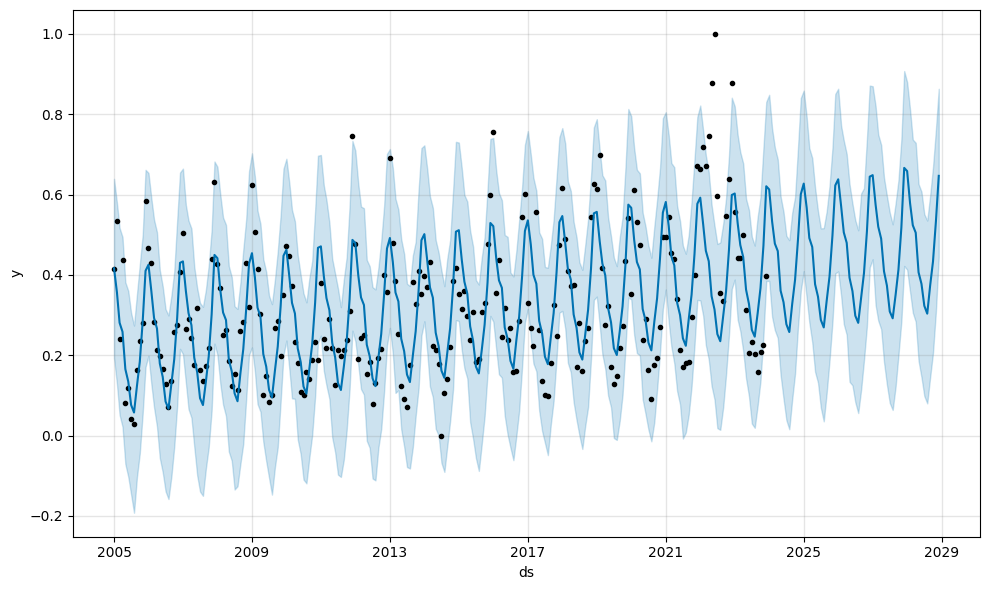

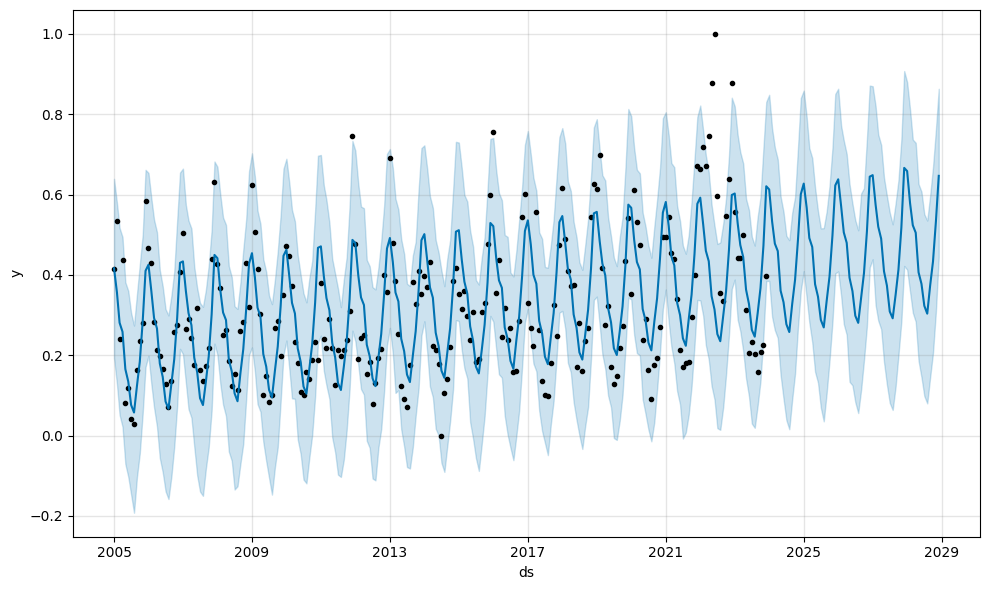

In [40]:
pro_model.plot(forecast, uncertainty=True)

C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is

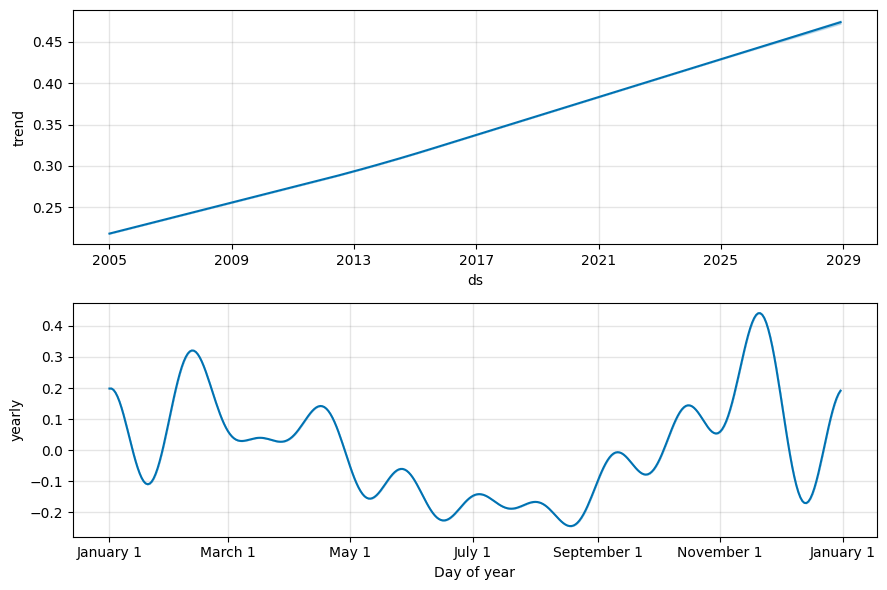

In [41]:
fig1=pro_model.plot_components(forecast)

C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


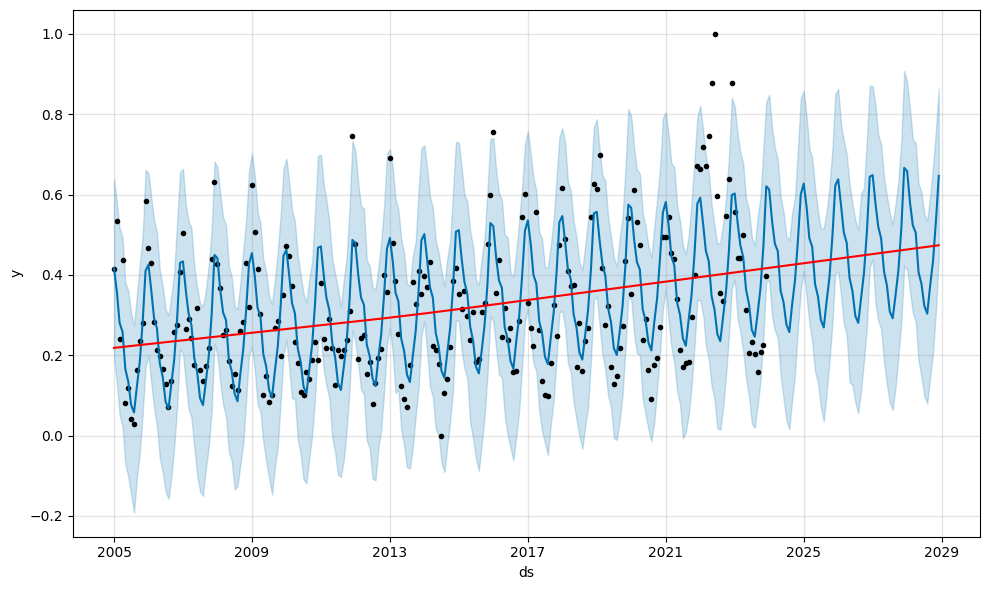

In [42]:
from prophet.plot import add_changepoints_to_plot
fig =pro_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),pro_model,forecast)

In [43]:
pro_model.changepoints

7     2005-08-01
14    2006-03-01
22    2006-11-01
29    2007-06-01
36    2008-01-01
43    2008-08-01
51    2009-04-01
58    2009-11-01
65    2010-06-01
72    2011-01-01
80    2011-09-01
87    2012-04-01
94    2012-11-01
101   2013-06-01
109   2014-02-01
116   2014-09-01
123   2015-04-01
130   2015-11-01
138   2016-07-01
145   2017-02-01
152   2017-09-01
159   2018-04-01
167   2018-12-01
174   2019-07-01
181   2020-02-01
Name: ds, dtype: datetime64[ns]

19:28:20 - cmdstanpy - INFO - Chain [1] start processing
19:28:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


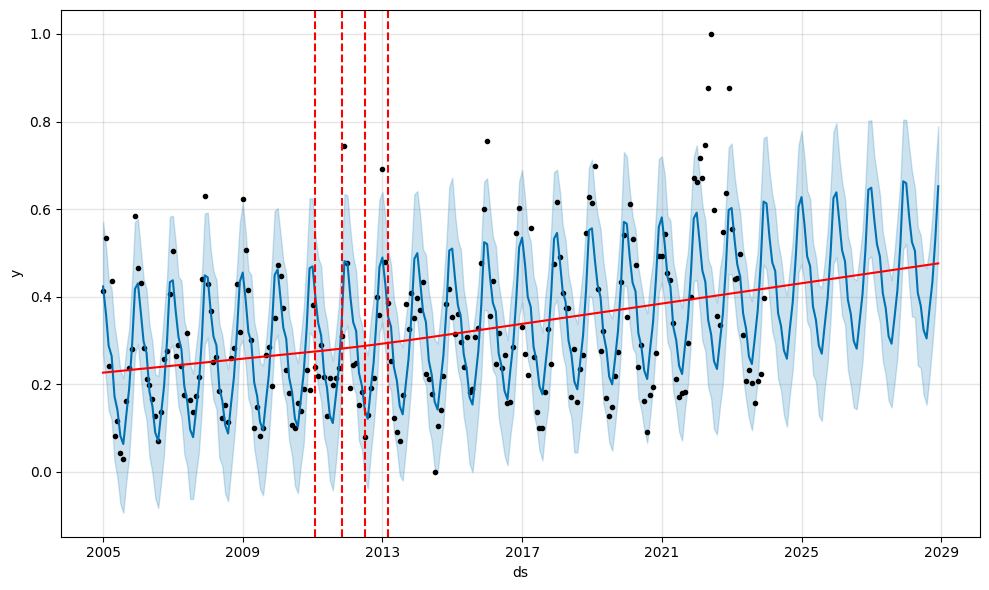

In [44]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(pm10_df).predict(future_date)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)